### Problem Statement:- This Project aims to predict potential Heart Diseases in people using machine learning models


#### Domain Analysis

In [79]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
labels_df=pd.read_csv("labels.csv")
values_df=pd.read_csv("values.csv")

In [81]:
data=pd.merge(values_df,labels_df, on="patient_id")
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [82]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [83]:
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [85]:
data.nunique()


patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [86]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [87]:
missing_values = data.isnull().sum()
print(missing_values)


patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64


                                                            ** Domain Analysis **

The dataset involves predicting potential Heart Diseases in people based on several features such as:

1) Age:-  Older age is strongly associated with a higher risk of heart disease, particularly in patients above 50 years.
2) Sex:-  Males tend to have a higher incidence of heart disease compared to females, especially in middle-aged groups.
3) Chest Pain Type:- Type of chest pain experienced by the patient (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
            -- Typical angina is most strongly associated with heart disease, while asymptomatic cases are less likely to be linked to heart disease.
4) Resting Blood Pressure:- High resting blood pressure is a common risk factor for heart disease.
5) Cholesterol:- Elevated cholesterol levels are strongly associated with heart disease, though heart disease can also be present in individuals with                    normal cholesterol.
6) Fasting Blood Sugar:- Higher fasting blood sugar levels are associated with an increased risk of heart disease, linking it to conditions like                                 diabetes.
7) Max Heart Rate Achieved:- The maximum heart rate achieved during exercise.Lower maximum heart rates during exercise can indicate underlying heart                                 conditions, while higher rates generally suggest better heart function.
8) Resting Electrocardiographic Results:-  Results from the resting electrocardiogram (0=normal; 1=ST-T wave abnormality; 2=left ventricular                                                        hypertrophy.)
                                        -- Abnormal ECG results, especially ST-T wave abnormalities, are strong indicators of heart disease.
9) Exercise-Induced Angina:- Patient experienced angina during exercise (1 = yes, 0 = no).
                          -- The presence of exercise-induced angina is a strong predictor of heart disease. 
10) Oldpeak (oldpeak_eq_st_depression):-  Depression in the ST segment of an ECG during or after exercise, measured in mm.
                                       -- Higher oldpeak values are associated with greater risks of heart disease, indicating significant ischemia.
11) Slope of the Peak Exercise ST Segment:- The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
                                         -- A downsloping ST segment during exercise is often associated with a higher risk of heart disease.
12) Number of Major Vessels Colored by Fluoroscopy:- The number of major blood vessels (0-3) colored by the fluoroscopy technique.
                                                  -- A higher number of vessels colored typically indicates a greater extent of heart disease.
13) Thalassemia (thal):- Thalassemia status(normal,fixed defect,reversible defect). The presence of defects (fixed or reversible) in thalassemia is                              strongly associated with heart disease.



#### EDA

In [89]:
numerical_features=['age','resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved']
categorical_features=['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina','heart_disease_present']

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

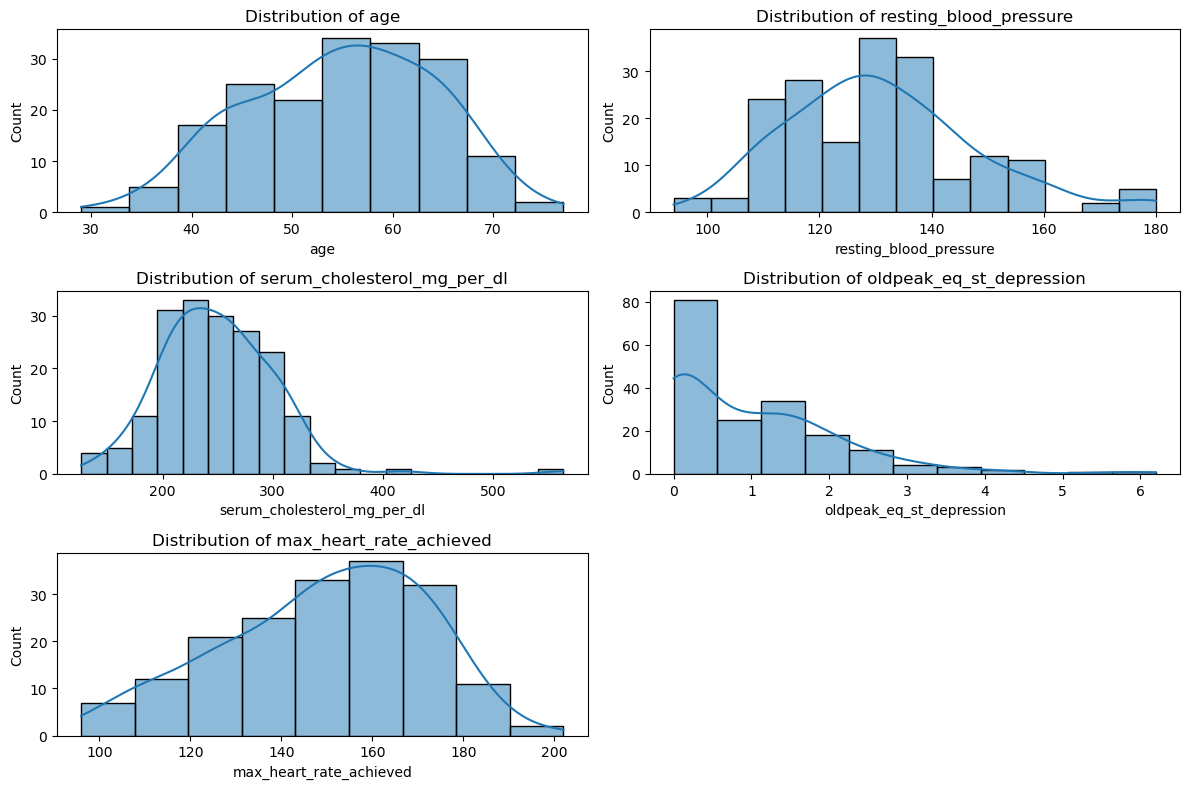

In [90]:
# Histograms for numerical features
plt.figure(figsize=(12,8))
for i, feature in enumerate(numerical_features,1):
    plt.subplot(3,2,i)
    sns.histplot(x=feature, data=data, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

Age:-- The age distribution of patients is generally centered around middle age (40-60 years).
    -- There might be a slight skew towards older individuals, which is expected given that heart disease risk typically increases with age.
Resting Blood Pressure:- The distribution is relatively normal but with some patients exhibiting high blood pressure.
    -- These outliers might be critical in identifying those at higher risk of heart disease.
Cholesterol Levels:- Cholesterol levels show a wide range, with some extreme values indicating potential outliers.
    -- The majority of patients have cholesterol levels within a standard range, but there are a few patients with very high cholesterol.
Max Heart Rate:- The max heart rate distribution appears to be fairly normal, with most patients having a max heart rate around 150-170 bpm.
    -- A few patients exhibit very low or very high heart rates, which could be indicative of underlying conditions.
Oldpeak ST Segment Depression:- Oldpeak ST Segment Depression reveals that while most patients have lower values, indicating minimal risk, there is a                                   subset with higher values that suggests a significant risk of heart disease.

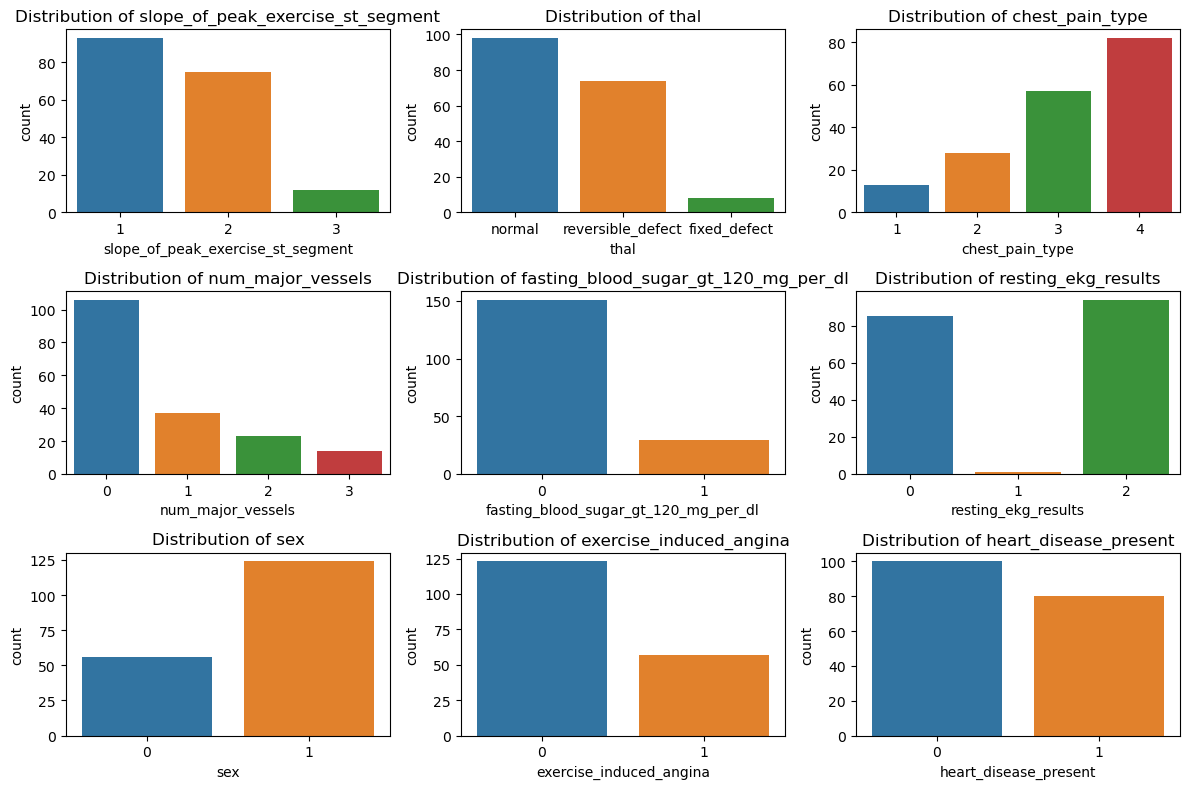

In [91]:
plt.figure(figsize=(12,8))
for i, feature in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(x=feature, data=data)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

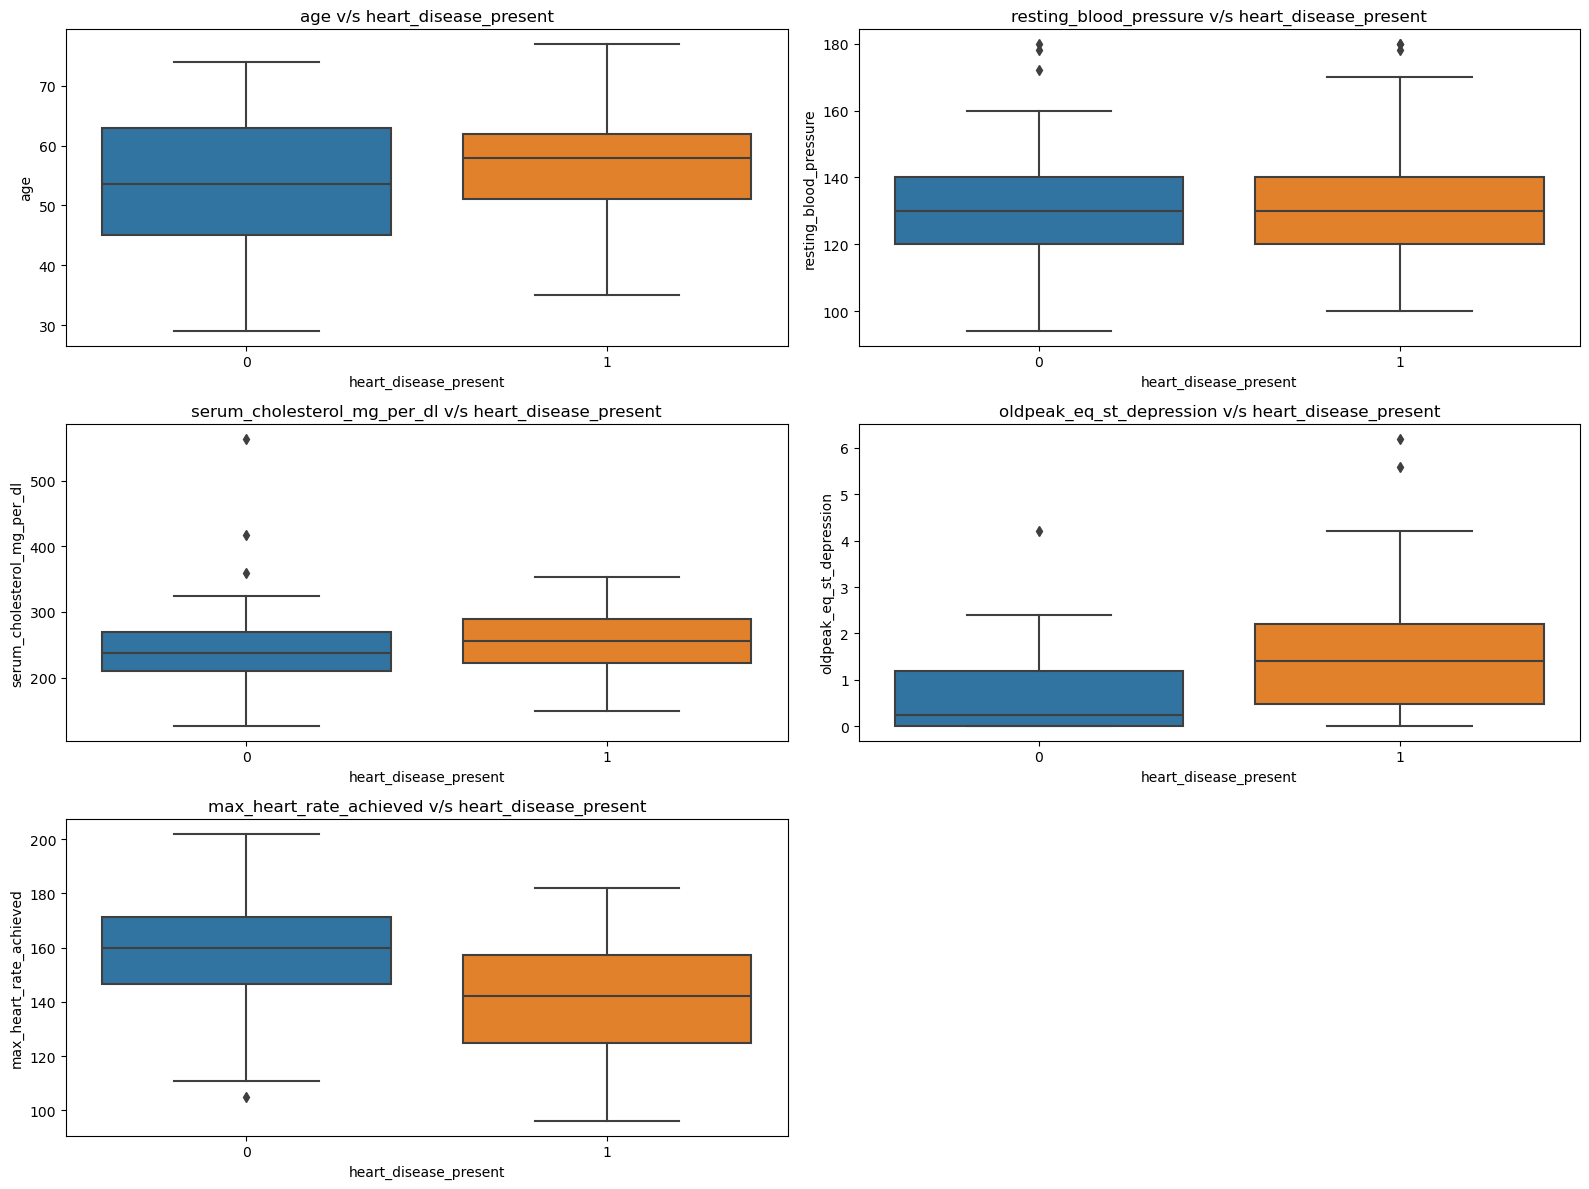

In [92]:
plt.figure(figsize=(16,12))
for i, feature in enumerate(numerical_features,1):
    plt.subplot(3,2,i)
    sns.boxplot(x='heart_disease_present', y=feature, data=data)
    plt.title(f"{feature} v/s heart_disease_present")
plt.tight_layout()
plt.show()

Age vs. Heart Disease Presence:-
   -- Older patients are more likely to have heart disease, with the likelihood increasing significantly for those above 50 years of age.
   -- There’s a noticeable trend where heart disease presence is lower in younger individuals.
Resting Blood Pressure vs. Heart Disease Presence:-
   -- Higher resting blood pressure correlates with an increased likelihood of heart disease, though there are cases with normal blood pressure that          also have heart disease.
Cholesterol vs. Heart Disease Presence:-
   -- High cholesterol levels are more common among patients with heart disease.However, there is no strict threshold, indicating that while high             cholesterol is a risk factor, heart disease can still be present in patients with lower cholesterol levels.
Max Heart Rate vs. Heart Disease Presence:-
   -- Patients with a lower max heart rate tend to have a higher prevalence of heart disease, indicating possible heart conditions affecting heart rate       response.
Oldpeak ST Segment Depression vs. Heart Disease Presence:-
   -- It shows that patients with heart disease tend to have higher ST depression values.

In [93]:
for feature in categorical_features:
    data[feature]= data[feature].astype(str)

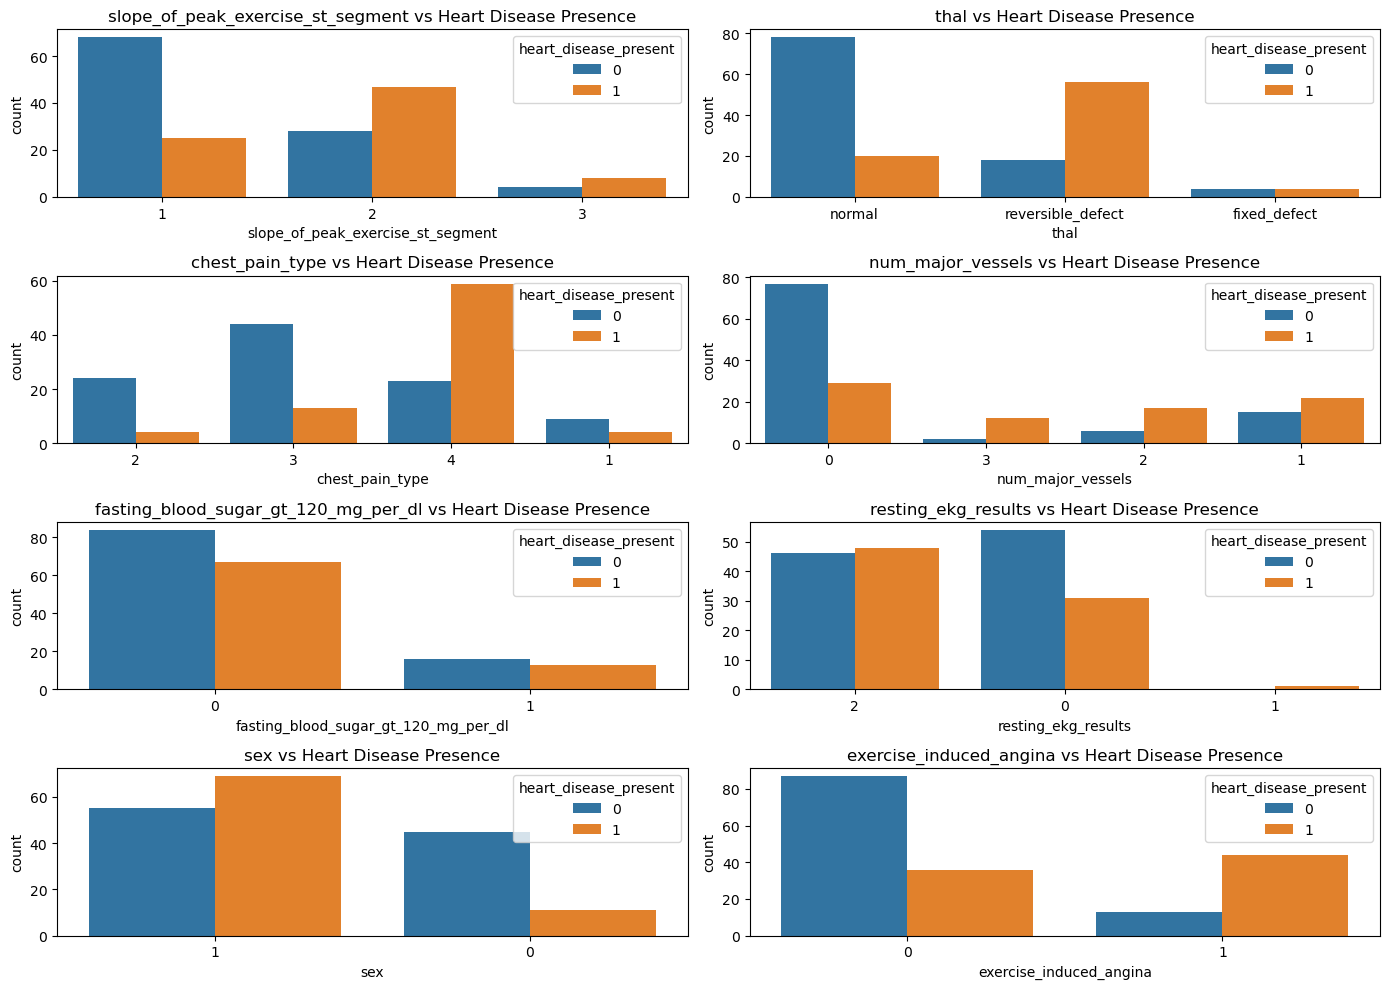

In [94]:
plt.figure(figsize=(14, 10))
for i,feature in enumerate(categorical_features[:-1], 1):  # excluding 'heart_disease_present'
    plt.subplot(4, 2, i)
    sns.countplot(x=feature, hue='heart_disease_present', data=data)
    plt.title(f'{feature} vs Heart Disease Presence')
plt.tight_layout()
plt.show()

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

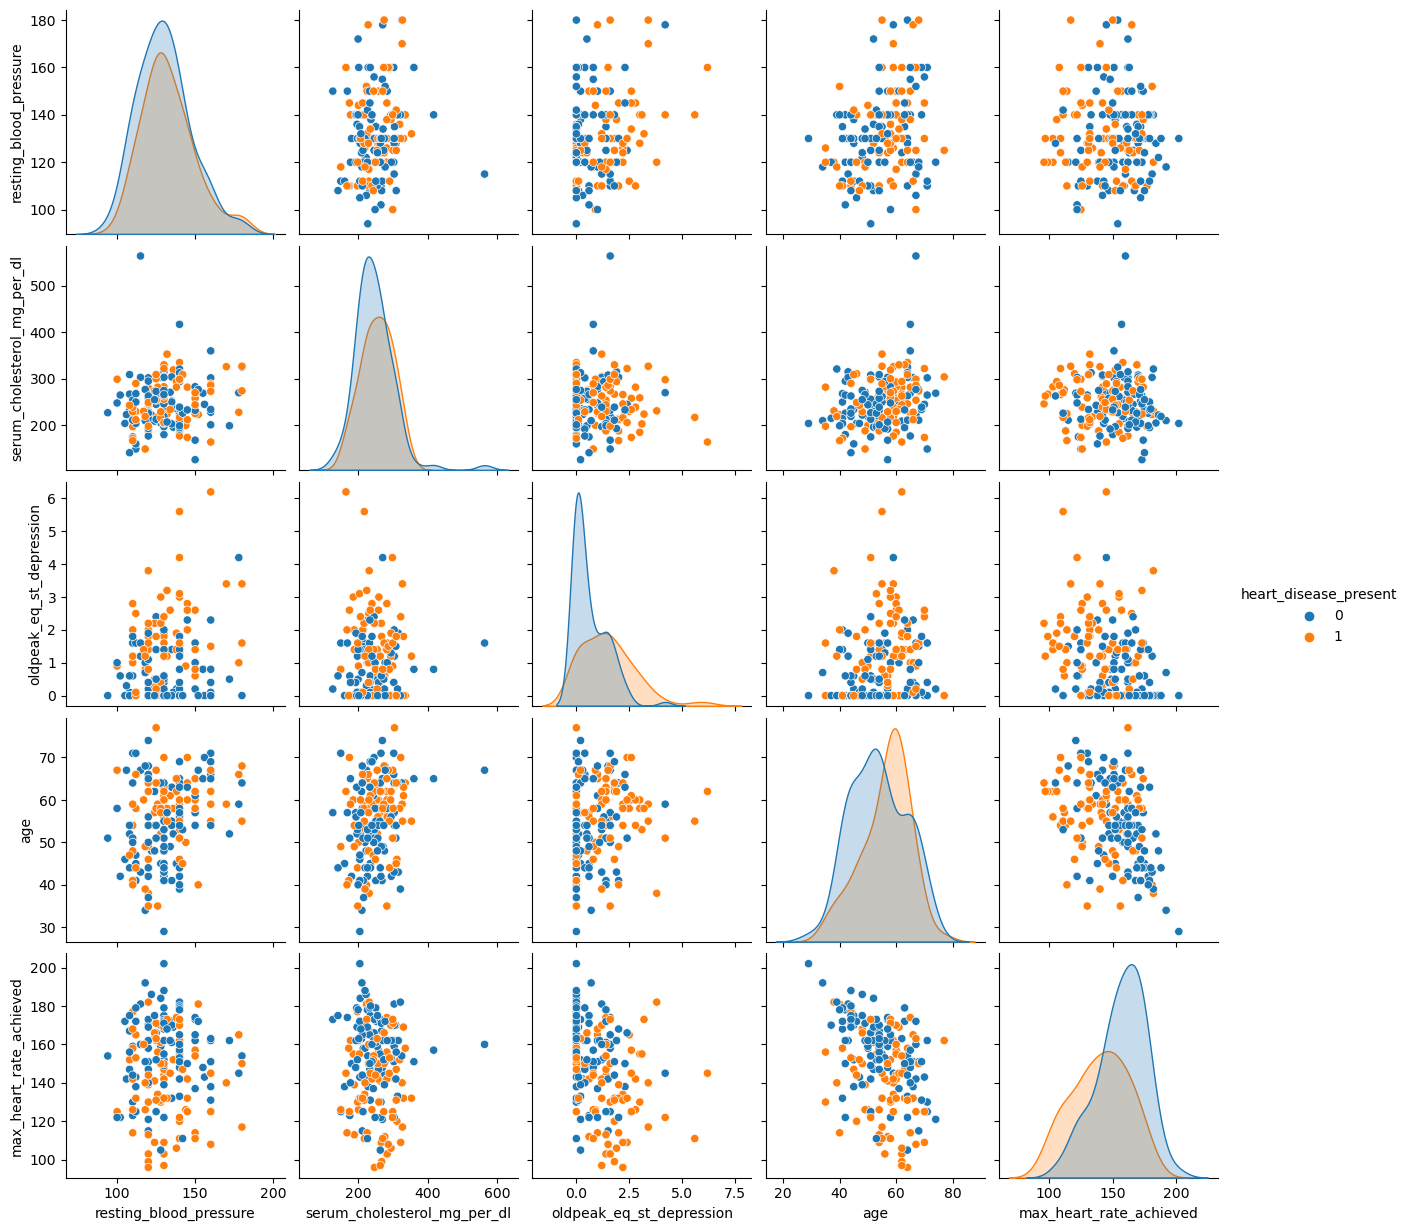

In [95]:
sns.pairplot(data, hue='heart_disease_present')
plt.show()

#### Data Pre-processing and Feature Engineering

In [96]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [97]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                     # Interquartile Range
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"Number of outliers in {column}: {outliers.shape[0]}")
    return outliers

In [98]:
# Detect outliers for each numerical feature
for column in numerical_features:
    print(f"Checking outliers for {column}")
    outliers = detect_outliers_iqr(data, column)
    print(outliers)

Checking outliers for age
Number of outliers in age: 0
Empty DataFrame
Columns: [patient_id, slope_of_peak_exercise_st_segment, thal, resting_blood_pressure, chest_pain_type, num_major_vessels, fasting_blood_sugar_gt_120_mg_per_dl, resting_ekg_results, serum_cholesterol_mg_per_dl, oldpeak_eq_st_depression, sex, age, max_heart_rate_achieved, exercise_induced_angina, heart_disease_present]
Index: []
Checking outliers for resting_blood_pressure
Number of outliers in resting_blood_pressure: 6
    patient_id slope_of_peak_exercise_st_segment               thal  \
4       oyt4ek                                 3  reversible_defect   
33      0n5fu0                                 1             normal   
72      qwj1yf                                 1  reversible_defect   
75      4v0q7o                                 2  reversible_defect   
113     sqddbc                                 2  reversible_defect   
176     2s2b1f                                 2             normal   

     res

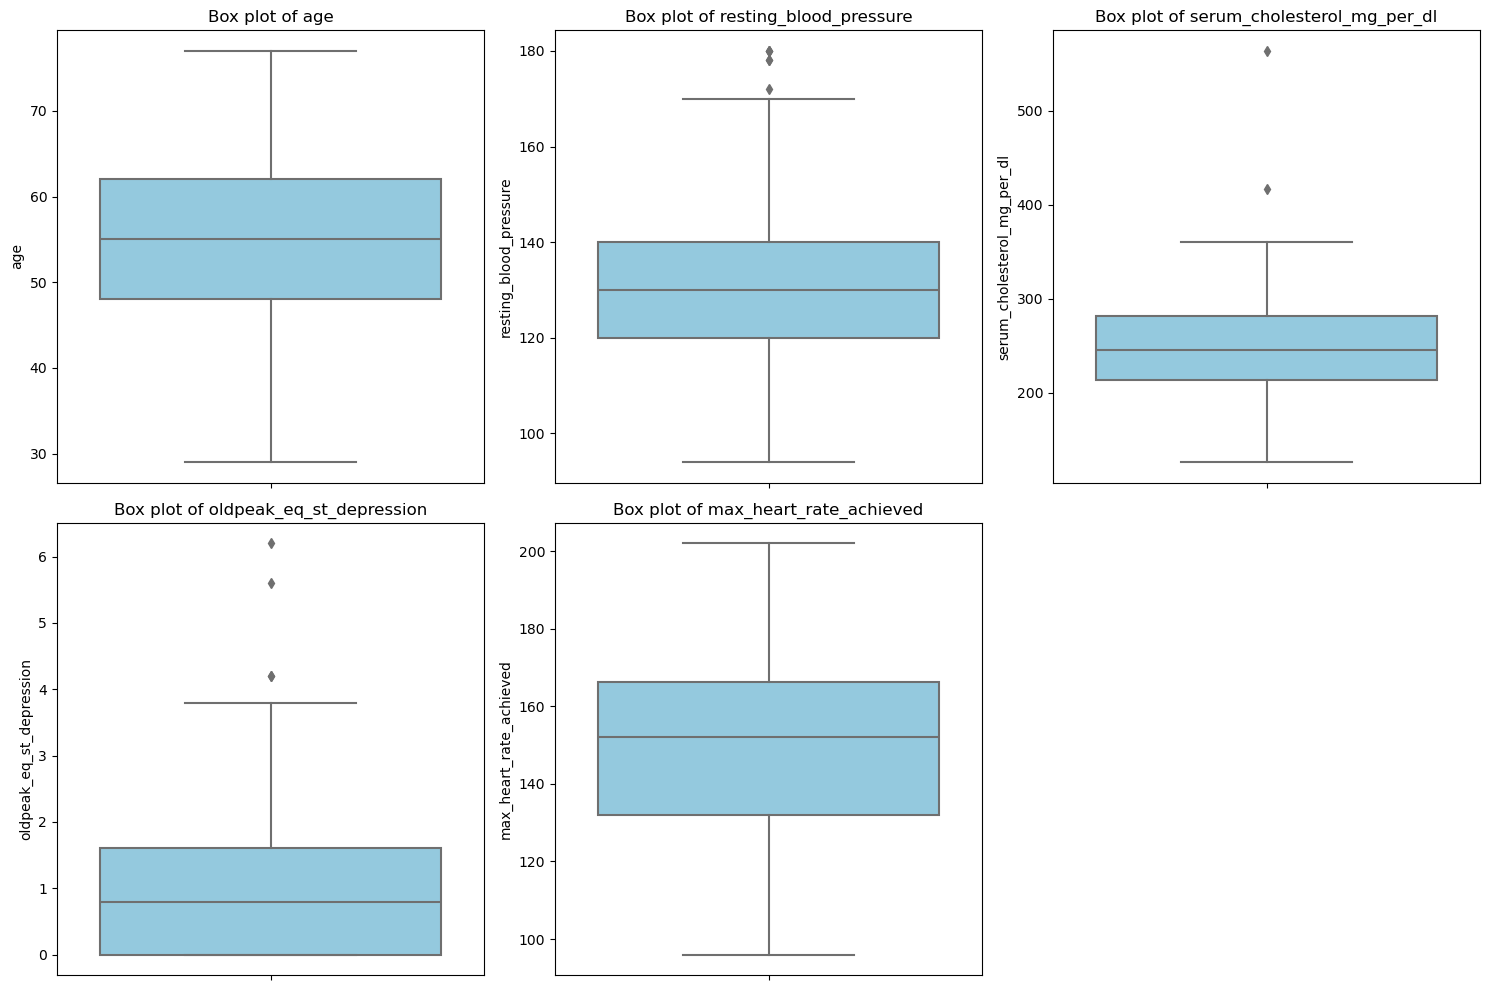

In [99]:

# Plot box plots for each numerical feature to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Adjust the layout as needed
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()


In [100]:
data.drop("patient_id", axis=1, inplace=True)

In [101]:
data.value_counts('thal')

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [102]:
from sklearn.preprocessing import LabelEncoder
le_thal=LabelEncoder()
data['thal']=le_thal.fit_transform(data['thal'])

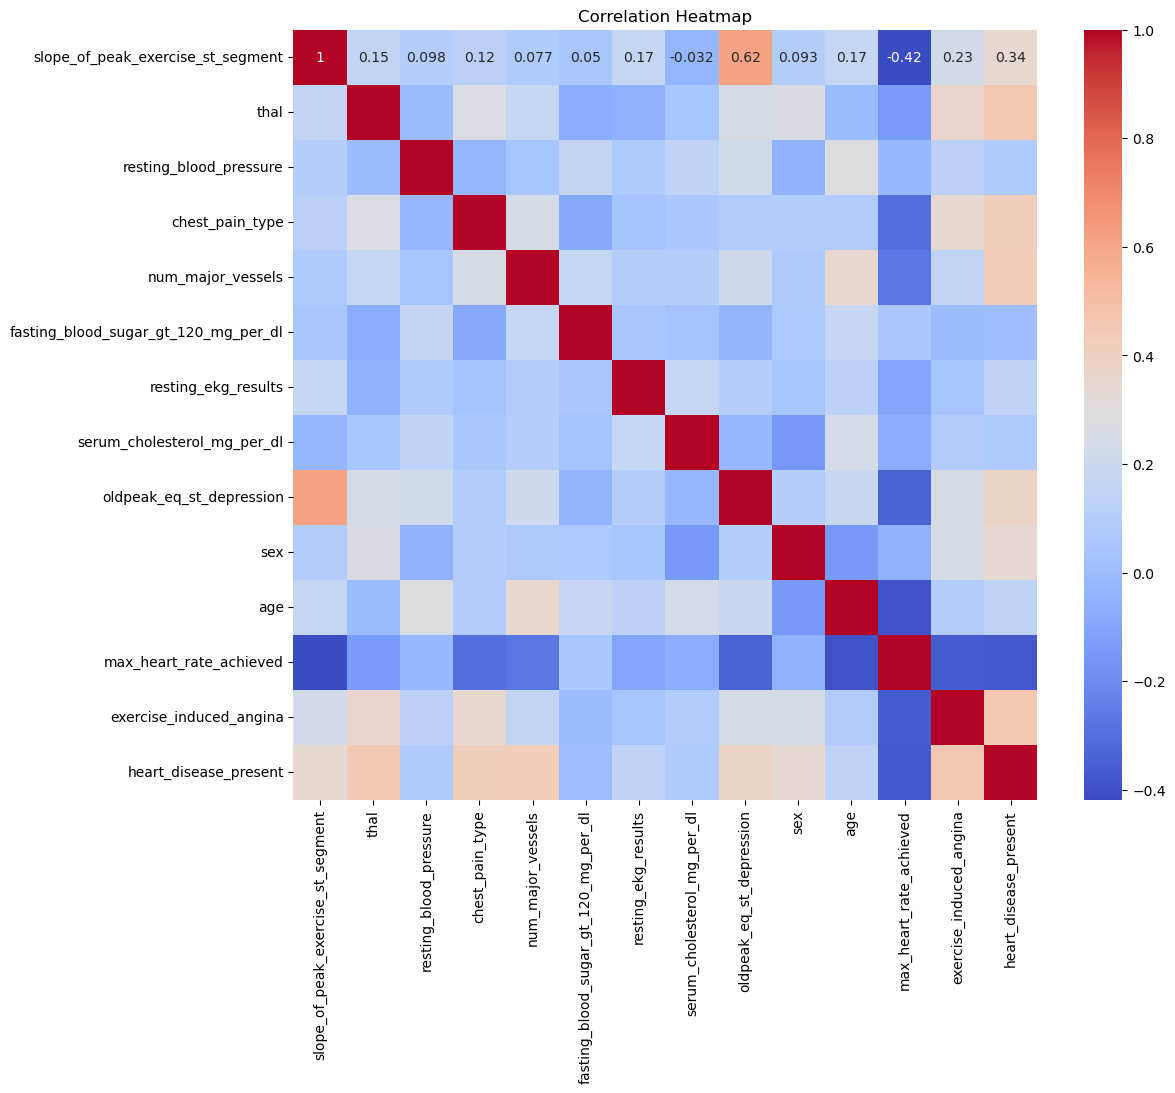

In [103]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Model creation and Evaluation

In [104]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# Separate features and target variable
X = data.drop('heart_disease_present', axis=1)
y = data['heart_disease_present']

label_encoders = {}
categorical_columns = [
    'slope_of_peak_exercise_st_segment',
    'thal',
    'chest_pain_type',
    'fasting_blood_sugar_gt_120_mg_per_dl',
    'resting_ekg_results',
    'sex',
    'exercise_induced_angina'
]

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [106]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Accuracy Score:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.96      0.76      0.85        29

    accuracy                           0.85        54
   macro avg       0.87      0.86      0.85        54
weighted avg       0.87      0.85      0.85        54

Confusion Matrix:
[[24  1]
 [ 7 22]]
Accuracy Score: 0.8518518518518519


In [107]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.62      0.77        29

    accuracy                           0.80        54
   macro avg       0.85      0.81      0.79        54
weighted avg       0.86      0.80      0.79        54

Confusion Matrix:
[[25  0]
 [11 18]]
Accuracy Score: 0.7962962962962963


In [108]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate the Decision Tree model
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        25
           1       0.83      0.69      0.75        29

    accuracy                           0.76        54
   macro avg       0.77      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54

Confusion Matrix:
[[21  4]
 [ 9 20]]
Accuracy Score: 0.7592592592592593


In [109]:
from sklearn.neighbors import KNeighborsClassifier

# Train K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)

# Evaluate the KNN model
y_pred_knn = knn.predict(X_test_scaled)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.95      0.69      0.80        29

    accuracy                           0.81        54
   macro avg       0.84      0.82      0.81        54
weighted avg       0.85      0.81      0.81        54

Confusion Matrix:
[[24  1]
 [ 9 20]]
Accuracy Score: 0.8148148148148148


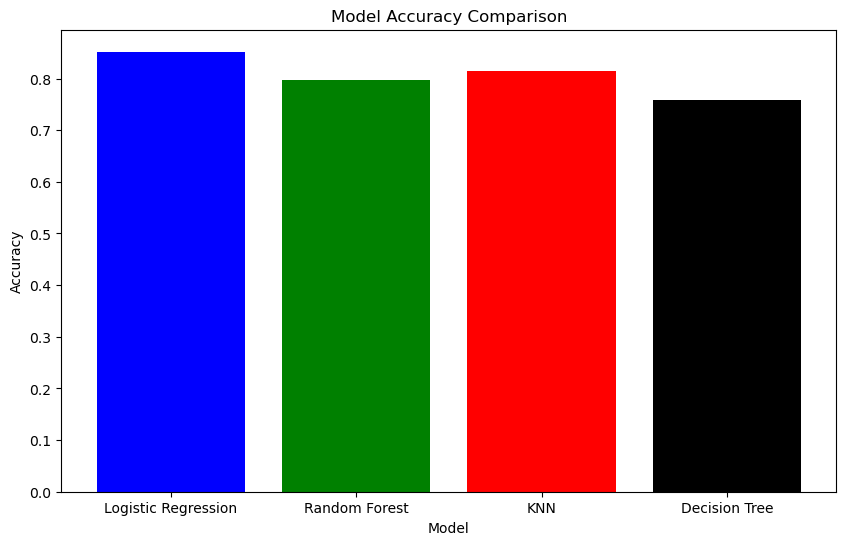

In [110]:
# Collect model accuracy scores
models = {
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'KNN' : accuracy_score(y_test, y_pred_knn),
    'Decision Tree' :accuracy_score(y_test, y_pred_dt)
  }

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), models.values(), color=['blue', 'green', 'red', 'black'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

# Initialize the model
lr = LogisticRegression(max_iter=1000)

# Perform Grid Search
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Accuracy Score for Logistic Regression:", grid_search_lr.best_score_)


Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score for Logistic Regression: 0.8418461538461539


e:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
250 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Anaconda\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the model
knn = KNeighborsClassifier()

# Perform Grid Search
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Accuracy Score for KNN:", grid_search_knn.best_score_)


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy Score for KNN: 0.8335384615384616


In [113]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy Score for Random Forest:", grid_search_rf.best_score_)


Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy Score for Random Forest: 0.8498461538461537


In [114]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy Score for Decision Tree:", grid_search_dt.best_score_)


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy Score for Decision Tree: 0.7858461538461539


Based on the data analysis and the predictive modeling, here are several recommendations for the hospital to improve early detection and prevention of heart diseases:
Age and Health Indicators:
      *  Regular Check-Ups for Middle-Aged and Elderly Patients:- Given that age is a significant factor, implement routine cardiovascular screenings                                                                      for patients above the age of 40.
      *  Monitor Key Health Metrics:- Regularly check resting blood pressure, serum cholesterol levels, and maximum heart rate, as these are key                                               indicators of heart health.
Focus on High-Risk Groups:
      *  Patients with Chest Pain: Special attention should be given to patients presenting with any type of chest pain, particularly those categorized                                     as having typical angina.
      *  Family History and Lifestyle Factors: Incorporate family history and lifestyle factors (e.g., smoking, diet, physical activity) into patient                                                   records to identify those at higher risk.
Leverage Technology for Early Detection:
      *  Use Predictive Models: Utilize the predictive model developed to identify high-risk patients during routine check-ups. Integrate this model                                     into the hospital’s electronic health record (EHR) system for automatic flagging.
       *  Wearable Technology: Encourage the use of wearable devices that monitor heart rate, physical activity, and other vital signs. Data from these                                 devices can be used to provide real-time alerts and long-term health monitoring.
Personalized Preventive Care Plans:
      *  Diet and Exercise Plans: Develop personalized diet and exercise plans based on individual risk profiles. Dieticians and fitness experts can                                       tailor programs to help manage weight, cholesterol, and blood pressure.
      *  Medication Management: For patients with hypertension, diabetes, or high cholesterol, ensure strict medication management and adherence to                                      prevent complications.
Education and Awareness:
      *  Heart Health Workshops: Organize regular workshops and seminars on heart health, covering topics like the importance of diet, exercise, and                                      stress management.
      *  Community Awareness: Educate the community about recognizing heart attack symptoms and the importance of seeking immediate medical attention.
Data-Driven Insights:
      *  Ongoing Data Collection and Analysis: Continuously collect and analyze patient data to refine predictive models and identify emerging trends.
      *  Clinical Trials and Research: Participate in clinical trials and research studies to stay at the forefront of heart disease prevention and                                             treatment.

### Heart Disease Prediction: Report on Challenges faced and Model Comparison Report

 The objective of this project was to build a predictive model to identify patients at risk of heart disease using a given dataset. The dataset consisted of clinical features and patient labels, with the target variable indicating the presence of heart disease. Multiple models were evaluated to determine the best approach for deployment in a production environment.

Challenges Faced:
 1) Categorical Data: The presence of categorical variables required conversion to a numerical format for machine learning models.
 2) Inconsistent Data Types: Some features had inconsistent data types, which caused issues during analysis and model training.
 3) Outliers: There were potential outliers in numerical features, which could skew the model's performance.
 4) Model Selection: Choosing the right models to evaluate was challenging given the variety of algorithms available.
 5) Inconsistent Target Values: The target variable was initially read as strings rather than integers, causing errors during model training.
 6) Interpreting Complex Models: Models like XGBoost, while powerful, were less interpretable than simpler models like logistic regression.
 7) Overfitting: Some models showed signs of overfitting, performing well on training data but poorly on test data.

Techinques Used:-
 1) Categorical Data Encoding:- Label Encoding was used to convert categorical features into numeric form.
 2) Outlier Detection and Handling:-  Box plots and IQR-scores were used to detect outliers.
 3) Standardization:- StandardScaler was applied to standardize the numerical features.
 4) Label Conversion:- The target variable was converted from strings to integers.
 5) Model Selection:- A range of models were chosen for evaluation, including Svm, RandomForestClassifier, LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier.
 -- These models were selected based on their known performance in classification tasks and their ability to handle both numerical and                      categorical data.
 6) Hyperparameter Tuning:- GridSearchCV was used for hyperparameter tuning on models.
 7) Cross-Validation:- Cross-validation (with 5 folds) was used to assess model performance more reliably.
                  --  Cross-validation helps in mitigating the overfitting issue by evaluating the model on different subsets of the data.
 8) Evaluation Metrics:- Multiple metrics (Accuracy, Precision, Recall, F1 Score) were used to evaluate the models.

Model Evaluation:-
  Using metrics such as Accuracy, Precision, Recall, and F1 Score to evaluate model performance and select the best model for deployment.

   Conclusion:-
    This report highlights the challenges encountered during data preprocessing, model selection, and evaluation. The GradientBoostingClassifier was        recommended for production deployment due to its superior performance. However, considerations around computational complexity and model                interpretability should be addressed before deployment to ensure the model's effectiveness in a real-world healthcare setting.
  